In [269]:
import pandas as pd
import numpy as np

decisions = pd.DataFrame()

for year in range(2017,2021):
    tmp = pd.read_csv(f"data/4th_downs/{year}.csv", encoding="latin-1", index_col=False)
    decisions = decisions.append(tmp)
    
decisions = decisions.loc[:, ~decisions.columns.str.contains('^Unnamed')]
decisions.head()

,game_id,play_id,season,week,desc,qtr,TimeSecsRem,distance,yards_to_goal,pos_team,...,fg_make_wp,fg_fail_wp,punt_wp,go_wp,go_success_prob,go_success_wp,go_fail_wp,choice,recommendation,strength
0,400933827,4.009338e+17,2017,1,Bo Scarbrough run for 3 yds to the FlaSt 30 fo...,1,1699,2,33,Alabama,...,0.777383,0.717251,0.742214,0.738833,0.606478,0.763908,0.700188,Go for it,Field goal attempt,0.003800
1,400933827,4.009338e+17,2017,1,Andy Pappanastos 42 yd FG MISSED,1,1557,5,25,Alabama,...,0.775608,0.714769,NaN,0.740652,0.430925,0.775948,0.713925,Field goal attempt,Field goal attempt,0.012623
2,400933827,4.009338e+17,2017,1,Deondre Francois sacked by Shaun Dion Hamilton...,1,1368,2,34,Florida State,...,0.384433,0.309281,0.348685,0.343285,0.545164,0.389803,0.287528,Go for it,Punt,0.005048
3,400933827,4.009338e+17,2017,1,Andy Pappanastos 35 Yd Field Goal,1,1170,10,18,Alabama,...,0.839094,0.805764,NaN,0.825585,0.332746,0.864720,0.806070,Field goal attempt,Field goal attempt,0.005285
4,400933827,4.009338e+17,2017,1,"Logan Tyler punt for 35 yds, fair catch by Tre...",2,621,3,68,Florida State,...,0.341567,0.198715,0.234143,0.221807,0.485130,0.247029,0.198041,Punt,Punt,0.012337


In [270]:
decisions["decision_value"] = np.where(decisions.recommendation == decisions.choice, decisions.strength, -1 * decisions.strength)
decisions.strength = round(100 * decisions.strength, 1)
decisions.decision_value = round(100 * decisions.decision_value, 1)

decisions.recommendation = np.select(
[
    decisions.recommendation.str.contains("Field goal attempt", na=False),
    decisions.recommendation.str.contains("Go for it", na=False),
    (decisions.decision_value >= -0.5) & (decisions.decision_value <= 0.5)
],
[
    "FG",
    "Go",
    "Toss-up"
], default = decisions.recommendation)

decisions.choice = np.select(
[
    decisions.choice.str.contains("Field goal attempt", na=False),
    decisions.choice.str.contains("Go for it", na=False)
],
[
    "FG",
    "Go"
], default = decisions.choice)

decisions["gt_coach"] = np.select(
[
    (decisions.pos_team.str.contains("Georgia Tech")) & (decisions.season < 2019),
    (decisions.pos_team.str.contains("Georgia Tech")) & (decisions.season >= 2019)
],
[
    "Paul Johnson",
    "Geoff Collins"
], default="FBS Average")
acc = [
    "Georgia Tech","Duke","North Carolina","Miami","Pittsburgh","Virginia","Virginia Tech",
    "Louisville","Florida State", "Clemson", "NC State", "Wake Forest", "Boston College","Syracuse",
    "Notre Dame"
]
decisions["conference"] = np.select(
[
    decisions.pos_team.isin(acc)
],
[
    "ACC"
], default = "FBS Average")


decisions.head()

,game_id,play_id,season,week,desc,qtr,TimeSecsRem,distance,yards_to_goal,pos_team,...,go_wp,go_success_prob,go_success_wp,go_fail_wp,choice,recommendation,strength,decision_value,gt_coach,conference
0,400933827,4.009338e+17,2017,1,Bo Scarbrough run for 3 yds to the FlaSt 30 fo...,1,1699,2,33,Alabama,...,0.738833,0.606478,0.763908,0.700188,Go,FG,0.4,-0.4,FBS Average,FBS Average
1,400933827,4.009338e+17,2017,1,Andy Pappanastos 42 yd FG MISSED,1,1557,5,25,Alabama,...,0.740652,0.430925,0.775948,0.713925,FG,FG,1.3,1.3,FBS Average,FBS Average
2,400933827,4.009338e+17,2017,1,Deondre Francois sacked by Shaun Dion Hamilton...,1,1368,2,34,Florida State,...,0.343285,0.545164,0.389803,0.287528,Go,Toss-up,0.5,-0.5,FBS Average,ACC
3,400933827,4.009338e+17,2017,1,Andy Pappanastos 35 Yd Field Goal,1,1170,10,18,Alabama,...,0.825585,0.332746,0.864720,0.806070,FG,FG,0.5,0.5,FBS Average,FBS Average
4,400933827,4.009338e+17,2017,1,"Logan Tyler punt for 35 yds, fair catch by Tre...",2,621,3,68,Florida State,...,0.221807,0.485130,0.247029,0.198041,Punt,Punt,1.2,1.2,FBS Average,ACC


In [271]:
# "obvious go" == +1.5 WP with "go" rec
obvious_go = decisions[(decisions.decision_value >= 1.5) & (decisions.recommendation == "Go")]
obvious_go.head()

,game_id,play_id,season,week,desc,qtr,TimeSecsRem,distance,yards_to_goal,pos_team,...,go_wp,go_success_prob,go_success_wp,go_fail_wp,choice,recommendation,strength,decision_value,gt_coach,conference
75,400933830,4.009338e+17,2017,1,Ty Isaac run for 18 yds to the Fla 38 for a 1S...,3,1671,1,56,Michigan,...,0.466628,0.715362,0.506096,0.367438,Go,Go,2.8,2.8,FBS Average,FBS Average
85,400933830,4.009338e+17,2017,1,Malik Zaire pass incomplete to Brandon Powell,4,202,3,62,Florida,...,0.035512,0.494433,0.058194,0.013329,Go,Go,1.8,1.8,FBS Average,FBS Average
116,400933832,4.009338e+17,2017,1,Keon Howard run for 1 yd to the SoMis 48 for a...,2,758,1,53,Southern Mississippi,...,0.155780,0.704107,0.181083,0.095569,Go,Go,2.4,2.4,FBS Average,FBS Average
187,400933837,4.009338e+17,2017,1,Jaylen Samuels 1 Yd pass from Ryan Finley (Car...,4,741,1,1,NC State,...,0.337741,0.662439,0.424588,0.167312,Go,Go,9.7,9.7,FBS Average,ACC
191,400933837,4.009338e+17,2017,1,Ryan Finley pass complete to Jaylen Samuels fo...,4,274,5,35,NC State,...,0.109064,0.401866,0.200069,0.047920,Go,Go,1.9,1.9,FBS Average,ACC


In [272]:
overall_decisions = decisions[(decisions.pos_team == "Georgia Tech") & (decisions.season == 2020)].groupby("recommendation")
overall_decisions.choice.value_counts(normalize=True).unstack()

choice,FG,Go,Penalty,Punt
recommendation,,,,
FG,0.375000,0.625000,NaN,NaN
Go,0.026316,0.473684,0.105263,0.394737
Punt,NaN,NaN,0.240000,0.760000
Toss-up,NaN,0.062500,0.062500,0.875000


In [273]:
optimal_decisions = decisions[(decisions.pos_team == "Georgia Tech") & (decisions.decision_value >= 1.5) & (decisions.season >= 2019)].groupby("recommendation")
optimal_decisions.choice.value_counts(normalize=True)

recommendation  choice
FG              FG        1.0
Go              Go        1.0
Punt            Punt      1.0
Name: choice, dtype: float64

In [276]:
overall_decisions = decisions.groupby(["recommendation","gt_coach"])
tmp = overall_decisions.choice.value_counts(normalize=True).unstack().reset_index()
tmp

coach_df = pd.melt(tmp[(tmp.gt_coach != "FBS Average")],id_vars=['gt_coach',"recommendation"],var_name='choice', value_name='value')
coach_df

,gt_coach,recommendation,choice,value
0,Geoff Collins,FG,FG,0.470588
1,Paul Johnson,FG,FG,0.541667
2,Geoff Collins,Go,FG,0.038961
3,Paul Johnson,Go,FG,0.064516
4,Geoff Collins,Punt,FG,NaN
5,Paul Johnson,Punt,FG,NaN
6,Geoff Collins,Toss-up,FG,NaN
7,Paul Johnson,Toss-up,FG,NaN
8,Geoff Collins,FG,Go,0.470588
9,Paul Johnson,FG,Go,0.375000


In [277]:
tmp_avg = decisions.groupby("recommendation").choice.value_counts(normalize=True).unstack().reset_index()
tmp_melt = pd.melt(tmp_avg,id_vars=["recommendation"],var_name='choice', value_name='value')
tmp_melt["gt_coach"] = "FBS Average"
coach_df = coach_df.append(tmp_melt)

coach_df["percentage"] = coach_df.value.apply(lambda x: "0.0%" if (np.isnan(x) == True) else f"{round(x * 100, 1)}%")
coach_df

,gt_coach,recommendation,choice,value,percentage
0,Geoff Collins,FG,FG,0.470588,47.1%
1,Paul Johnson,FG,FG,0.541667,54.2%
2,Geoff Collins,Go,FG,0.038961,3.9%
3,Paul Johnson,Go,FG,0.064516,6.5%
4,Geoff Collins,Punt,FG,NaN,0.0%
5,Paul Johnson,Punt,FG,NaN,0.0%
6,Geoff Collins,Toss-up,FG,NaN,0.0%
7,Paul Johnson,Toss-up,FG,NaN,0.0%
8,Geoff Collins,FG,Go,0.470588,47.1%
9,Paul Johnson,FG,Go,0.375000,37.5%


In [278]:
# https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460

import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Optimal Decision"),
    yaxis=dict(tickformat=".0%"),
    barmode="stack",
    title='<b>Georgia Tech 4th Down Decision Making (2017-2020)</b><br><span style="color:#222;font-size:12px;">Recommendations provided by A.I. Sports 4th Down Bot, created by Jared Lee (<a href="https://twitter.com/JDLee">@JDLee</a>). Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>',
    legend_title="Coach's Choice",
    width=1024,
    height=512
)

colors = ['#002c59', '#B3A369','gold', 'gray']

for r, c in zip(coach_df.choice.unique(), colors):
    plot_df = coach_df[(coach_df.choice == r)]
    fig.add_trace(
        go.Bar(x=[plot_df.recommendation, plot_df.gt_coach], y=plot_df.value, text=plot_df.percentage, textposition='auto', name=r, marker_color=c),
    )    
    
fig

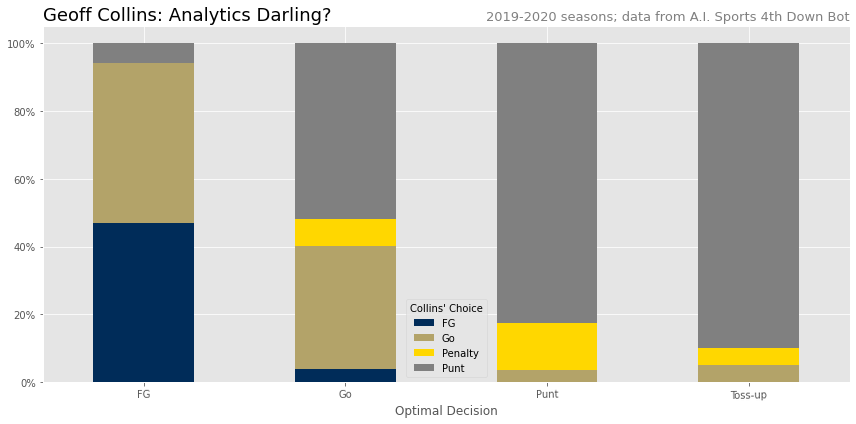

In [279]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

def create_decision_chart(df, title, subtitle, legend_title):
    sub_df = df.groupby("recommendation").choice.value_counts(normalize=True).unstack()
    ax = sub_df.plot(kind='bar',stacked=True,rot=1, xlabel="Optimal Decision", figsize=(12,6), color=['#002c59', '#B3A369','gold', 'gray'])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.legend(title=legend_title)
    plt.title(title, loc='left', fontsize=18)
    plt.title(subtitle, loc='right', fontsize=13, color="gray")
    plt.tight_layout()
    plt.show()

create_decision_chart(decisions[(decisions.pos_team == "Georgia Tech") & (decisions.season >= 2019)],"Geoff Collins: Analytics Darling?","2019-2020 seasons; data from A.I. Sports 4th Down Bot",'Collins\' Choice')


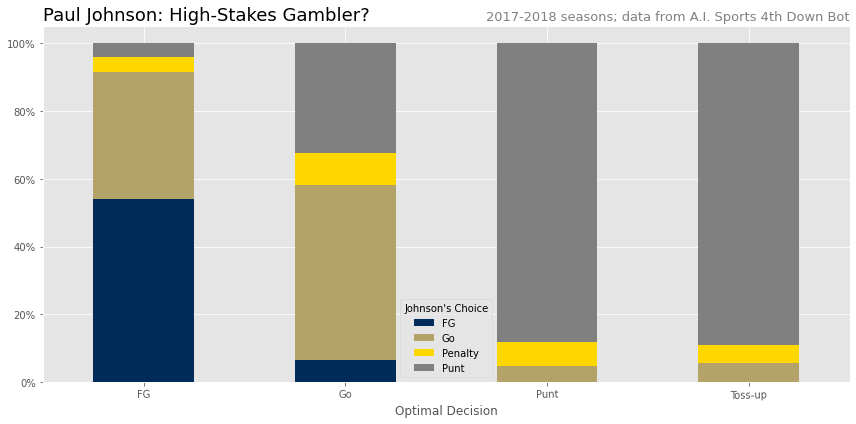

In [280]:
create_decision_chart(decisions[(decisions.pos_team == "Georgia Tech") & (decisions.season < 2019)],"Paul Johnson: High-Stakes Gambler?","2017-2018 seasons; data from A.I. Sports 4th Down Bot",'Johnson\'s Choice')

In [76]:
# base_df = overall_decisions.choice.value_counts(normalize=True).reset_index(name='count')
# base_df

In [281]:
import plotly.express as px

def make_plotly_decision_chart(df, title, subtitle, legend_title):
    base_df = df.groupby("recommendation").choice.value_counts(normalize=True).reset_index(name='count')
    fig = px.bar(base_df, x="recommendation", y="count", color="choice", title=title, color_discrete_map={
        "Go" : "#b3a369",
        "Punt" : "gray",
        "FG" : "#002c59",
        "Penalty" : "gold"
    }, labels=dict(recommendation="Optimal Decision", count="", choice=legend_title))
    fig.add_annotation(dict(xref='paper',
                            yref='paper',
                            x=1.0, y=-0.25,
                            showarrow=False,
                            align="right",
                            text ='<span style="color:#000;">Recommendations provided by A.I. Sports 4th Down Bot, created by Jared Lee (<a href="https://twitter.com/JDLee">@JDLee</a>).</span><br><span style="color:#000;">Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>'
                           )
                      )
    fig.update_layout(width=1024,
                      height=512,
                    title=dict(
                        text=f'<b>{title}</b><br><i style="font-size:15px;">{subtitle}</i>',
                        font=dict(
                            family="Arial",
                            size=20,
                            color='#000000'
                        )
                    ),
                     yaxis=dict(tickformat=".0%"))
    fig.show()
    
make_plotly_decision_chart(decisions[(decisions.pos_team == "Georgia Tech") & (decisions.season >= 2019)],"Geoff Collins: Analytics Darling?","2019-2020 seasons; data from A.I. Sports 4th Down Bot",'Collins\' Choice')


In [282]:
make_plotly_decision_chart(decisions[(decisions.pos_team == "Georgia Tech") & (decisions.season < 2019)],"Paul Johnson: High-Stakes Gambler?","2017-2018 seasons; data from A.I. Sports 4th Down Bot",'Johnson\'s Choice')


In [283]:
conf_decisions = decisions.groupby(["recommendation","conference"])
tmp = conf_decisions.choice.value_counts(normalize=True).unstack().reset_index()
acc_df=pd.melt(tmp[(tmp.conference == "ACC")],id_vars=["conference","recommendation"],var_name='choice', value_name='value')

tmp_avg = decisions.groupby("recommendation").choice.value_counts(normalize=True).unstack().reset_index()
tmp_melt = pd.melt(tmp_avg,id_vars=["recommendation"],var_name='choice', value_name='value')
tmp_melt["conference"] = "FBS Average"

acc_df = acc_df.append(tmp_melt)
acc_df["percentage"] = acc_df.value.apply(lambda x: "0.0%" if (np.isnan(x) == True) else f"{round(x * 100, 1)}%")
acc_df

,conference,recommendation,choice,value,percentage
0,ACC,FG,FG,0.676005,67.6%
1,ACC,Go,FG,0.156086,15.6%
2,ACC,Punt,FG,0.003715,0.4%
3,ACC,Toss-up,FG,0.011643,1.2%
4,ACC,FG,Go,0.221681,22.2%
5,ACC,Go,Go,0.345734,34.6%
6,ACC,Punt,Go,0.029721,3.0%
7,ACC,Toss-up,Go,0.067270,6.7%
8,ACC,FG,Penalty,0.046285,4.6%
9,ACC,Go,Penalty,0.069147,6.9%


In [299]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Optimal Decision"),
    yaxis=dict(tickformat=".0%"),
    barmode="stack",
    title='<b>ACC 4th Down Decision Making (2017-2020)</b><br><span style="color:#222;font-size:12px;">Recommendations provided by A.I. Sports 4th Down Bot, created by Jared Lee (<a href="https://twitter.com/JDLee">@JDLee</a>). Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>',
    legend_title="Coach's Choice",
    width=1024,
    height=512
)


colors = ['#002c59', '#B3A369','gold', 'gray']
recommendation_ids = ["FG","Go","Penalty","Punt"]

for r, c in zip(acc_df.choice.unique(), colors):
    plot_df = acc_df[(acc_df.choice == r)]
    fig.add_trace(
        go.Bar(x=[plot_df.recommendation, plot_df.conference], y=plot_df.value, text=plot_df.percentage, textposition='auto', name=r, marker_color=c),
    )    
    
fig

In [289]:
conf_szn_decisions = decisions.groupby(["season","recommendation","conference"])
tmp = conf_szn_decisions.choice.value_counts(normalize=True).unstack().reset_index()
acc_szn_df=pd.melt(tmp[tmp.conference != "ACC"],id_vars=["season","conference","recommendation"],var_name='choice', value_name='value')

acc_szn_df["percentage"] = acc_szn_df.value.apply(lambda x: "0.0%" if (np.isnan(x) == True) else f"{round(x * 100, 1)}%")
acc_szn_df

,season,conference,recommendation,choice,value,percentage
0,2017,ACC,FG,FG,0.641791,64.2%
1,2017,ACC,Go,FG,0.153846,15.4%
2,2017,ACC,Punt,FG,NaN,0.0%
3,2017,ACC,Toss-up,FG,0.017442,1.7%
4,2018,ACC,FG,FG,0.661765,66.2%
...,...,...,...,...,...,...
59,2019,ACC,Toss-up,Punt,0.867925,86.8%
60,2020,ACC,FG,Punt,0.059783,6.0%
61,2020,ACC,Go,Punt,0.377143,37.7%
62,2020,ACC,Punt,Punt,0.897833,89.8%


In [290]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Optimal Decision"),
    yaxis=dict(tickformat=".0%"),
    barmode="stack",
    title='<b>ACC 4th Down Decision Making (2017-2020)</b><br><span style="color:#222;font-size:12px;">Recommendations provided by A.I. Sports 4th Down Bot, created by Jared Lee (<a href="https://twitter.com/JDLee">@JDLee</a>). Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>',
    legend_title="Coach's Choice",
    width=1024,
    height=512
)


colors = ['#002c59', '#B3A369','gold', 'gray']
recommendation_ids = ["FG","Go","Penalty","Punt"]

for r, c in zip(acc_szn_df.choice.unique(), colors):
    plot_df = acc_szn_df[(acc_szn_df.choice == r)]
    fig.add_trace(
        go.Bar(x=[plot_df.season, plot_df.recommendation], y=plot_df.value, text=plot_df.percentage, textposition='auto', name=r, marker_color=c),
    )    
    
fig

In [292]:
conf_2020_decisions = decisions[(decisions.conference == "ACC") & (decisions.season == 2020)].groupby(["recommendation","pos_team"])
tmp = conf_2020_decisions.choice.value_counts(normalize=True).unstack().reset_index()
acc_team_df=pd.melt(tmp[tmp.pos_team.isin(acc)],id_vars=["pos_team","recommendation"],var_name='choice', value_name='value')


tmp_avg = decisions[(decisions.season == 2020)].groupby(["recommendation"]).choice.value_counts(normalize=True).unstack().reset_index()
tmp_melt = pd.melt(tmp_avg,id_vars=["recommendation"],var_name='choice', value_name='value')
tmp_melt["pos_team"] = "FBS Average"

acc_team_df = acc_team_df.append(tmp_melt)

acc_team_df["percentage"] = acc_team_df.value.apply(lambda x: "0.0%" if (np.isnan(x) == True) else f"{round(x * 100, 1)}%")
acc_team_df

,pos_team,recommendation,choice,value,percentage
0,Boston College,FG,FG,0.928571,92.9%
1,Clemson,FG,FG,0.750000,75.0%
2,Duke,FG,FG,0.500000,50.0%
3,Florida State,FG,FG,0.714286,71.4%
4,Georgia Tech,FG,FG,0.375000,37.5%
...,...,...,...,...,...
11,FBS Average,Toss-up,Penalty,0.060137,6.0%
12,FBS Average,FG,Punt,0.047537,4.8%
13,FBS Average,Go,Punt,0.383110,38.3%
14,FBS Average,Punt,Punt,0.899427,89.9%


In [293]:
acc_team_df[(acc_team_df.recommendation == "Go") & (acc_team_df.recommendation == acc_team_df.choice)].sort_values(by="value", ascending=False).head()

,pos_team,recommendation,choice,value,percentage
80,Louisville,Go,Go,0.515152,51.5%
78,Florida State,Go,Go,0.500000,50.0%
87,Virginia,Go,Go,0.500000,50.0%
79,Georgia Tech,Go,Go,0.473684,47.4%
77,Duke,Go,Go,0.416667,41.7%


In [296]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Optimal Decision"),
    yaxis=dict(tickformat=".0%"),
    barmode="stack",
    title='<b>ACC Atlantic 4th Down Decision Making in 2020</b><br><span style="color:#222;font-size:12px;">Recommendations provided by A.I. Sports 4th Down Bot, created by Jared Lee (<a href="https://twitter.com/JDLee">@JDLee</a>). Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>',
    legend_title="Coach's Choice",
    width=1024,
    height=512
)


colors = ['#002c59', '#B3A369','gold', 'gray']
recommendation_ids = ["FG","Go","Penalty","Punt"]

coastal = ["Georgia Tech","Duke","North Carolina","Miami","Pittsburgh","Virginia","Virginia Tech"]
atlantic = ["Louisville","Florida State", "Clemson", "NC State", "Wake Forest", "Boston College","Syracuse"]

coastal_df = acc_team_df[acc_team_df.pos_team.isin(coastal)]
atlantic_df = acc_team_df[acc_team_df.pos_team.isin(atlantic)]

for r, c in zip(atlantic_df.choice.unique(), colors):
    plot_df = atlantic_df[(atlantic_df.choice == r)]
    fig.add_trace(
        go.Bar(x=[plot_df.recommendation, plot_df.pos_team], y=plot_df.value, name=r, marker_color=c),
    )    
    
fig

In [8]:
pbp_data = pd.DataFrame()
years = range(2020, 2021)
for i in years:
    url = f"https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_{i}.parquet"
    print(f"Pulling url {url}")
    i_data = pd.read_parquet(url, engine='pyarrow')

    #sort=True eliminates a warning and alphabetically sorts columns
    pbp_data = pbp_data.append(i_data, sort=True)

#Give each row a unique index
pbp_data.reset_index(drop=True, inplace=True)
pbp_data.head()

Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2020.parquet


,EPA,ExpScoreDiff,ExpScoreDiff_Time_Ratio,FG_after,FG_before,Goal_To_Go,Goal_To_Go_end,No_Score_after,No_Score_before,Opp_FG_after,...,yds_kickoff,yds_kickoff_return,yds_penalty,yds_punt_gained,yds_punt_return,yds_punted,yds_receiving,yds_rushed,yds_sacked,year
0,0.000000,0.833168,0.000231,0.146772,0.170347,False,False,0.002032,0.001775,0.110364,...,65.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,-0.942772,0.833168,0.000231,0.134086,0.146772,False,False,0.002164,0.002032,0.129309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,-0.580199,-0.109604,-0.000030,0.113570,0.134086,False,False,0.002116,0.002164,0.142802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2020.0
3,3.684710,-0.689802,-0.000192,0.205539,0.113570,False,False,0.001360,0.002116,0.060326,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,2020.0
4,-0.336147,2.994907,0.000832,0.218856,0.205539,False,False,0.001399,0.001360,0.064455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2020.0


In [9]:
pbp_data["is_GT"] = np.where(pbp_data.pos_team.str.contains("Georgia Tech"), "Georgia Tech", "FBS Average")
valid_plays = pbp_data[(pbp_data.down > 0) & (pbp_data.down < 5) & (pbp_data.distance > 0) & (pbp_data.distance < 16) & (pbp_data.kick_play == False) & (pbp_data.punt_play == False)]

In [10]:
yardage_epa_base = valid_plays.groupby(["is_GT", 'distance']).EPA.mean()
yardage_epa = yardage_epa_base.reset_index(name='avgEPA')
yardage_epa

,is_GT,distance,avgEPA
0,FBS Average,1.0,-0.136450
1,FBS Average,2.0,-0.173797
2,FBS Average,3.0,-0.096108
3,FBS Average,4.0,-0.050286
4,FBS Average,5.0,-0.040567
5,FBS Average,6.0,-0.092425
6,FBS Average,7.0,-0.090527
7,FBS Average,8.0,-0.032025
8,FBS Average,9.0,-0.068948
9,FBS Average,10.0,-0.084191


In [40]:
def generate_epa_fig(df, title, subtitle, color="is_GT", color_map={ "Georgia Tech" : "#b3a369", "FBS Average" : "blue" }):
    fig = px.scatter(df,
                     x="distance", 
                     y="avgEPA", 
                     color=color, 
                     labels={"distance":"Yards to Go", "avgEPA":"EPA/Play", f"{color}":""}, 
                     trendline="lowess", 
                     color_discrete_map=color_map
                    )
    fig.update_layout(width=1024,
                          height=512,
                          xaxis = dict(
                            tickmode = 'linear',
#                             range=[0, 16],
                            tick0 = 0,
                            dtick = 1
                          ),
                          yaxis = dict(
                            range=[-1, 1],
                            tickmode = 'linear',
                            tick0 = -1,
                            dtick = 0.5
                          ),
                          title=dict(
                            yanchor="top",
                            text=f'<b>{title}</b> <i style="font-size:15px;">{subtitle}</i>',
                            font=dict(
                                family="Arial",
                                size=20,
                                color='#000000'
                            ),
                            pad = dict(b = 90)
                          )
                         )
    fig.add_annotation(dict(xref='paper',
                        yref='paper',
                        x=1.0, y=-0.2,
                        showarrow=False,
                        align="right",
                        text ='<span style="color:#000;">Data provided by <a href="https://twitter.com/cfbscrapR">@cfbscrapR</a>.</span> <span style="color:#000;">Chart created by Akshay Easwaran (<a href="https://twitter.com/akeaswaran">@akeaswaran</a>).</span>'
                       )
                  )
    return fig

In [33]:
epa_fig = generate_epa_fig(yardage_epa, "Dave Patenaude vs FBS Average", "EPA/Play by Distance | All Situations")
epa_fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['coach', 'distance', 'avgEPA'] but received: is_GT

In [ ]:
pass_epa_base = valid_plays[valid_plays["pass"] == True].groupby(["distance", 'is_GT']).EPA.mean()
pass_epa = pass_epa_base.reset_index(name='avgEPA')
pass_epa

pass_epa_fig = generate_epa_fig(pass_epa, "Dave Patenaude vs FBS Average", "EPA/Play by Distance | Passes")
pass_epa_fig.show()

In [ ]:
rush_epa_base = valid_plays[valid_plays["rush"] == True].groupby(["distance", 'is_GT']).EPA.mean()
rush_epa = rush_epa_base.reset_index(name='avgEPA')
rush_epa

rush_epa_fig = generate_epa_fig(rush_epa, "Dave Patenaude vs FBS Average", "EPA/Play by Distance | Rushes")
rush_epa_fig.show()

In [ ]:
early_downs_pass_epa_base = valid_plays[(valid_plays["pass"] == True) & (valid_plays.down < 3)].groupby(["distance", 'is_GT']).EPA.mean()
early_downs_pass = early_downs_pass_epa_base.reset_index(name='avgEPA')
early_downs_pass

ed_pass_fig = generate_epa_fig(early_downs_pass, "Dave Patenaude vs FBS Average", "EPA/Play by Distance | Early Downs Passing")
ed_pass_fig.show()

In [ ]:
early_downs_rush_epa_base = valid_plays[(valid_plays["rush"] == True) & (valid_plays.down < 3)].groupby(["distance", 'is_GT']).EPA.mean()
early_downs_rush = early_downs_rush_epa_base.reset_index(name='avgEPA')
early_downs_pass

ed_rush_fig = generate_epa_fig(early_downs_rush, "Dave Patenaude vs FBS Average", "EPA/Play by Distance | Early Downs Rushing")
ed_rush_fig.show()

In [ ]:
pbp_data = pd.DataFrame()
years = range(2014, 2021)
for i in years:
    url = f"https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_{i}.parquet"
    print(f"Pulling url {url}")
    i_data = pd.read_parquet(url, engine='pyarrow')

    #sort=True eliminates a warning and alphabetically sorts columns
    pbp_data = pbp_data.append(i_data, sort=True)

#Give each row a unique index
pbp_data.reset_index(drop=True, inplace=True)
pbp_data.head()

In [ ]:
pbp_data["coach"] = np.where(pbp_data.pos_team.str.contains("Georgia Tech"), np.where(pbp_data.year <= 2018, "Paul Johnson", "Geoff Collins"), "FBS Average")
coach_valid_plays = pbp_data[(pbp_data.down > 0) & (pbp_data.down < 5) & (pbp_data.distance > 0) & (pbp_data.distance < 16) & (pbp_data.kick_play == False) & (pbp_data.punt_play == False)]

In [31]:
coach_yardage_epa_base = valid_plays.groupby(["coach", 'distance']).EPA.mean()
coach_yardage_epa = coach_yardage_epa_base.reset_index(name='avgEPA')
coach_yardage_epa

,coach,distance,avgEPA
0,FBS Average,1.0,-0.212302
1,FBS Average,2.0,-0.159192
2,FBS Average,3.0,-0.122488
3,FBS Average,4.0,-0.077841
4,FBS Average,5.0,-0.076781
5,FBS Average,6.0,-0.079506
6,FBS Average,7.0,-0.094632
7,FBS Average,8.0,-0.091954
8,FBS Average,9.0,-0.108614
9,FBS Average,10.0,-0.098246


In [41]:
coach_fig = generate_epa_fig(coach_yardage_epa, "Paul Johnson vs Geoff Collins", "EPA/Play by Distance | All Situations", color="coach", color_map={ "Paul Johnson" : "#b3a369", "Geoff Collins" : "blue", "FBS Average" : "gray" })
coach_fig.show()